<a href="https://colab.research.google.com/github/ingoscargiraldor/ingoscargiraldor/blob/main/Dataset_Operaciones_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** AirBnb Listings - Mexico City, Distrito Federal, Mexico [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Mexico City. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. Imagine you're a consultant for individuals or firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: August, 2023

In [87]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Loading the data

In [105]:
# Loading the CSV file as dataframe
Operación_df = pd.read_csv("./data/Dataset_Ventas.csv", encoding="ISO-8859-1")

In [106]:
# Showing dataframe dimensions
Operación_df.shape

(10092, 12)

In [107]:
# Showing column types
Operación_df.dtypes

Factura                                           int64
Fecha de contabilización                         object
Nombre de cliente/proveedor                      object
Nombre de empleado del departamento de ventas    object
Descripción artículo/serv.                       object
LOTE                                             object
Ciudad                                           object
Cantidad                                          int64
Precio Unitario                                   int64
Total líneas                                      int64
Impuesto total                                    int64
Número de referencia del SN                      object
dtype: object

In [108]:
#fifa_df.head() # Showing the first rows
#fifa_df.tail() # Showing last first rows
Operación_df.sample(10) # Showing a sample of n rows

,Factura,Fecha de contabilización,Nombre de cliente/proveedor,Nombre de empleado del departamento de ventas,Descripción artículo/serv.,LOTE,Ciudad,Cantidad,Precio Unitario,Total líneas,Impuesto total,Número de referencia del SN
2335,34,31/01/2020,BIOSTAR PHARMACEUTICAL S.A.,JENNY MAGALY GONZALEZ FLOREZ,SALDOS INICIAL 01-31-2020,NaN,NaN,0,4753125,4753125,0,FE 0FE32634
5773,39040,29/10/2021,INTERPHARMA DE COLOMBIA SAS,-Ningún empleado del departamento de ventas-,FC 120 ESTANTERIA BG 76,NaN,NaN,1,9967650,9967650,0,NaN
3558,36834,20/10/2020,BIOCHEM FARMACEUTICA DE COLOMBIA S.A.,JENNY MAGALY GONZALEZ FLOREZ,DIMINACENE DIACETURATO,EDA001113A,BOGOTA,25,305500,7637500,0,20972
9064,41113,29/11/2022,LABORATORIOS VETERLAND LTDA,JENNY MAGALY GONZALEZ FLOREZ,SULFAGUANIDINA,220211,BOGOTA,50,80000,4000000,0,13854
5378,42047,20/06/2023,BIOSTAR PHARMACEUTICAL S.A.,JENNY MAGALY GONZALEZ FLOREZ,PRAZIQUANTEL MICRONIZADO,PZ202210023,TOCANCIPÁ,25,480000,12000000,0,1641
6701,39593,16/02/2022,LABORATORIOS EDO SAS,YENNY PATRICIA MORALES BENITEZ,ALBENDAZOL MICRONIZADO,20210243,YUMBO,300,125000,37500000,0,2001526
8463,41684,12/04/2023,WEISS PHARMA SAS,LINA PAOLA CRISOSTOMO DIAZ,FENBENDAZOL MICRONIZADO,3032212901,NaN,50,250000,12500000,0,2890
8313,41006,09/11/2022,COASPHARMA SAS,JENNY MAGALY GONZALEZ FLOREZ,DEXAMETASONA SODIO FOSFATO MICRONIZADA,APL/01122/G-21,BOGOTA,1,5100000,5100000,0,36970
228,101,31/01/2020,CHEMICAL SERVICES SAS,JENNY MAGALY GONZALEZ FLOREZ,SALDOS INICIAL 01-31-2020,NaN,NaN,0,1529105,1529105,0,FE 00035251
2695,37166,04/12/2020,TORRIJOS SABOGAL ANA MIREYA,LINA PAOLA CRISOSTOMO DIAZ,ACIDO ACETIL SALICILICO,5002200000000,NaN,50,19000,950000,180500,4122020


## 1. Verificar Caliad de los datos

In [93]:
!pip install pylev

In [109]:
import re
from random import randint
from datetime import datetime
from difflib import SequenceMatcher

import numpy as np
import pandas as pd

import pylev

## Detectando duplicados sobre las columnas

In [110]:
duplicados = Operación_df[Operación_df.duplicated(subset=['Factura', 'Número de referencia del SN', 'Descripción artículo/serv.', 'Total líneas', 'Cantidad', 'LOTE'], keep=False)]
duplicados.sort_values(by=['Factura', 'Número de referencia del SN', 'Descripción artículo/serv.', 'Total líneas', 'Cantidad', 'LOTE'], ascending=True).head(10)

,Factura,Fecha de contabilización,Nombre de cliente/proveedor,Nombre de empleado del departamento de ventas,Descripción artículo/serv.,LOTE,Ciudad,Cantidad,Precio Unitario,Total líneas,Impuesto total,Número de referencia del SN
2443,35751,17/04/2020,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,AMPICILINA SODICA POLVO ESTERIL,2005200465,BOGOTA,1,450000,450000,85500,4145
2444,35751,17/04/2020,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,AMPICILINA SODICA POLVO ESTERIL,2005200465,BOGOTA,1,450000,450000,85500,4145
3565,36753,07/10/2020,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,ETHION TECNICO (PI INDUSTRIES),2004ET041,BOGOTA,1000,42000,42000000,0,4336
3566,36753,07/10/2020,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,ETHION TECNICO (PI INDUSTRIES),2004ET041,BOGOTA,1000,42000,42000000,0,4336
4593,36855,26/10/2020,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,ETHION TECNICO (PI INDUSTRIES),2004ET041,BOGOTA,1000,42000,42000000,0,4336
4594,36855,26/10/2020,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,ETHION TECNICO (PI INDUSTRIES),2004ET041,BOGOTA,1000,42000,42000000,0,4336
2251,37131,02/12/2020,LABORATORIOS EDO SAS,YENNY PATRICIA MORALES BENITEZ,VITAMINA E ALFA TOCOFEROL ACETATO,01200508EJ,YUMBO,20,85000,1700000,0,10101
2252,37131,02/12/2020,LABORATORIOS EDO SAS,YENNY PATRICIA MORALES BENITEZ,VITAMINA E ALFA TOCOFEROL ACETATO,01200508EJ,YUMBO,20,85000,1700000,0,10101
4344,37831,05/04/2021,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,ETHION TECNICO (HEMANI),15,BOGOTA,1000,42000,42000000,0,4692
4345,37831,05/04/2021,KYROVET LABORATORIES S.A.,YENNY PATRICIA MORALES BENITEZ,ETHION TECNICO (HEMANI),15,BOGOTA,1000,42000,42000000,0,4692


In [111]:
Operación_df = Operación_df.drop_duplicates(subset=['Factura', 'Número de referencia del SN', 'Descripción artículo/serv.', 'Total líneas', 'Cantidad', 'LOTE'], keep='first')

In [112]:
# Lista de columnas que quieres considerar para buscar duplicados
columnas_a_verificar = ['Factura', 'Número de referencia del SN', 'Descripción artículo/serv.', 'Total líneas', 'Cantidad', 'LOTE']

# Encuentra las filas duplicadas basadas en las columnas especificadas
duplicados = Operación_df[Operación_df.duplicated(subset=['Factura', 'Número de referencia del SN', 'Descripción artículo/serv.', 'Total líneas', 'Cantidad', 'LOTE'], keep=False)]

duplicados.sort_values(by=['Factura', 'Número de referencia del SN', 'Descripción artículo/serv.', 'Total líneas', 'Cantidad', 'LOTE'], ascending=True).head(10)

,Factura,Fecha de contabilización,Nombre de cliente/proveedor,Nombre de empleado del departamento de ventas,Descripción artículo/serv.,LOTE,Ciudad,Cantidad,Precio Unitario,Total líneas,Impuesto total,Número de referencia del SN


In [113]:
Operación_df.shape

(10069, 12)

## Validando que la Columna Total lineas este correcta

In [114]:
Operación_df['Cantidad'] = pd.to_numeric(Operación_df['Cantidad'], errors='coerce')
Operación_df['Precio Unitario'] = pd.to_numeric(Operación_df['Precio Unitario'], errors='coerce')
Operación_df['Total líneas'] = pd.to_numeric(Operación_df['Total líneas'], errors='coerce')

In [115]:
multiplicacion = Operación_df['Cantidad'] * Operación_df['Precio Unitario']

# Compara los resultados con la columna 'Total Líneas'
comparacion = multiplicacion == Operación_df['Total líneas']

# Verifica si todos los valores son True (correctos)
es_correcto = comparacion.all()

# Muestra el resultado
if es_correcto:
    print("Los valores en 'Total Líneas' son correctos.")
else:
    print("Al menos un valor en 'Total Líneas' no es correcto.")

Al menos un valor en 'Total Líneas' no es correcto.


In [116]:
Operación_df['Total líneas'] = Operación_df['Cantidad'] * Operación_df['Precio Unitario']

In [123]:
multi_df = Operación_df
# Calcular la multiplicación de 'Cantidad' por 'Precio Unitario'
multiplicacion = Operación_df['Cantidad'] * Operación_df['Precio Unitario']

# Compara los resultados con la columna 'Total Líneas' y crea una columna 'Es Correcto' en el DataFrame
multi_df['Es Correcto'] = multiplicacion == Operación_df['Total líneas']

filas_incorrectas = multi_df[multi_df['Es Correcto'] == False]

# Filtra las filas donde 'Es Correcto' es False
sample_filas_incorrectas = filas_incorrectas.sample(min(0, len(filas_incorrectas)))

In [125]:
sample_filas_incorrectas.sample(len(sample_filas_incorrectas))

,Factura,Fecha de contabilización,Nombre de cliente/proveedor,Nombre de empleado del departamento de ventas,Descripción artículo/serv.,LOTE,Ciudad,Cantidad,Precio Unitario,Total líneas,Impuesto total,Número de referencia del SN,Es Correcto


## 2. Univariate analysis

## Nombre de cliente/proveedor

In [126]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
Operación_df["Nombre de cliente/proveedor"].nunique()

307

In [127]:
# Showing unique values of neighbourhoods
Operación_df["Nombre de cliente/proveedor"].unique()

array(['DUARTE RODRIGUEZ WILLIAM MOISES', 'PRODIA SAS', 'COASPHARMA SAS',
       'BELL CHEM INTERNACIONAL SAS', 'COMPAÑIA CALIFORNIA S.A.',
       'LABORATORIOS ROLDY VETERINARIA LIMITADA',
       'JIR PRODUCTOS QUIMICOS SAS',
       'PRODUCTOS MEDICOS VETERINARIOS S.A.', 'NOVALFARM LTDA',
       'BIOSTAR PHARMACEUTICAL S.A.', 'LABORATORIOS VM SAS',
       'VICAR FARMACEUTICA S.A.', 'LABORATORIOS TIERWELT SAS',
       'VECOL S.A.',
       'CARIBBEAN SUNRISE LABORATORIOS M&F CHEMICAL´ S S.A.S',
       'IMPORTADORA Y DISTRIBUIDORA DE SUMISTROS SAS',
       'EMPRESA DE COSMETICOS Y SERVICIOS SA', 'AGROZ S.A.',
       'BIOTECNO ZF SAS',
       'GVM CORPORATION GLOBAL VETERINARY MEDICINE S A S',
       'BIOCHEM FARMACEUTICA DE COLOMBIA S.A.', 'OPTI-VET LTDA',
       'QUIMICA INTERKROL LTDA', 'LABORATORIOS ZOO SAS', 'FARMATEC LTDA',
       'ADVANCEPHARMA S.A.S', 'LABORATORIOS GENERALES SAN PEDRO SAS',
       'LABORATORIOS SERVINSUMOS S A', 'CHEMICAL SERVICES SAS',
       'BEST AMAZON EXPORT 

In [128]:
# Calculating the relative frecuency of room types
Operación_df["Nombre de cliente/proveedor"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

LABORATORIOS EDO SAS              0.071705
LABORATORIOS VETERLAND LTDA       0.060085
KYROVET LABORATORIES S.A.         0.045387
LABORATORIOS VM SAS               0.041514
COASPHARMA SAS                    0.033568
                                    ...   
PRODUCTOS DROGAM S.A.S            0.000099
FYAPAC SAS                        0.000099
ELITE NISSIM Y CIA S EN C         0.000099
GONZALEZ MURCIA CARLOS EDUARDO    0.000099
QUIMICA M.G. SAS                  0.000099
Name: Nombre de cliente/proveedor, Length: 307, dtype: float64

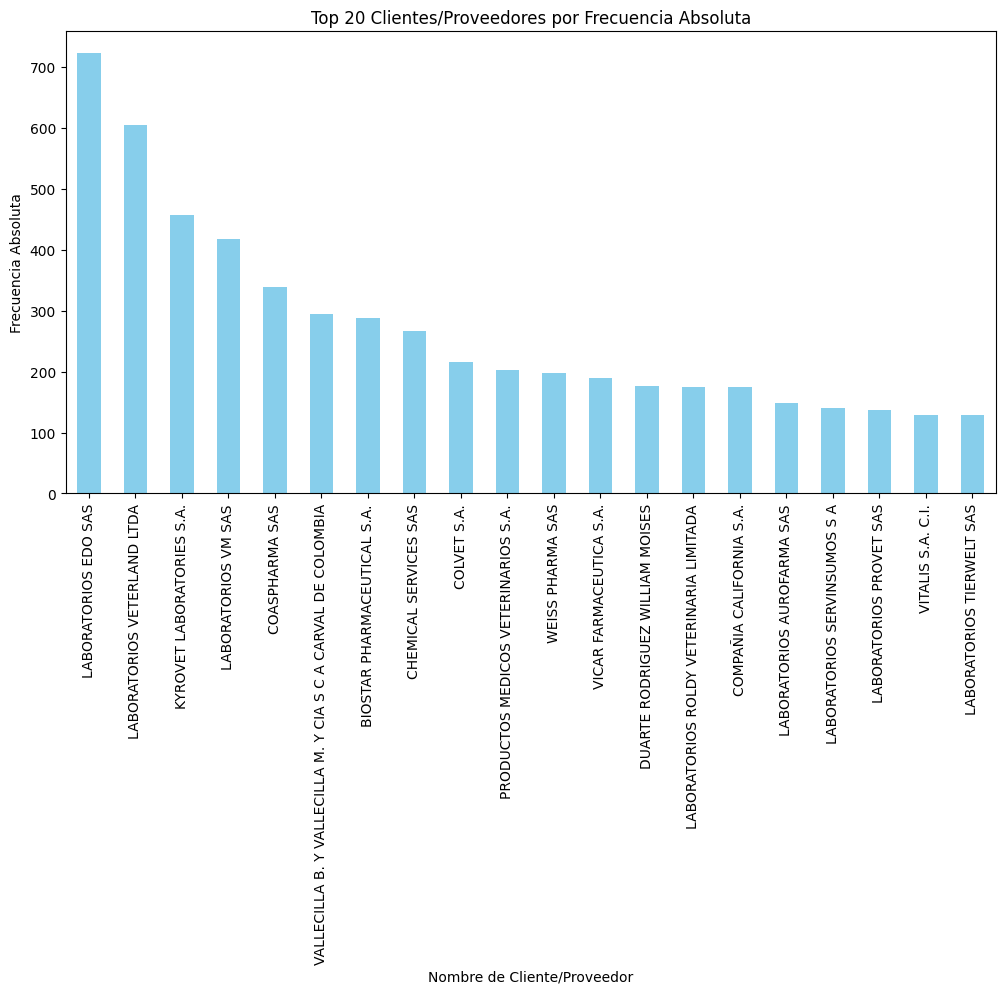

In [130]:
# Calcula la frecuencia de cada valor en la columna 'Nombre de cliente/proveedor'
frecuencia_clientes = Operación_df['Nombre de cliente/proveedor'].value_counts()

# Selecciona los 20 valores principales
top_20_clientes = frecuencia_clientes.head(20)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
top_20_clientes.plot(kind='bar', color='skyblue')
plt.title("Top 20 Clientes/Proveedores por Frecuencia Absoluta")
plt.xlabel("Nombre de Cliente/Proveedor")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=90)  # Rotar etiquetas en el eje X para mayor legibilidad

plt.show()

<span style="color: red;">What does it means the value of 0 for this attribute?</span>

In [ ]:
# We need to transform the price attribute from object to float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [ ]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

<span style="color: red;">This attribute has a extreme outlier making difficult a proper visualization?</span>

In [ ]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

In [ ]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_df["has_availability"].value_counts().plot(kind="bar", ax=ax1, color="orange")
listings_df["instant_bookable"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Has availability frecuency")
ax2.set_title("Instant bookable frecuency")
plt.show()

In [ ]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

## 2. Bivariate analysis

In [ ]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

In [ ]:
# For large datasets, some visualizations are innefective when trying to represent individual instances
# A naive strategy is to use only a random sample to visualize
listings_sample_df =  listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

In [ ]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

In [ ]:
# Anothe common strategy for working with datasets with high variability is filter the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

In [ ]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [ ]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

In [ ]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

In [ ]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.xlim([0, 200])
plt.show()